In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [4]:
test_df=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
train_df=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')


In [5]:
train_df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [7]:
train_df.sample()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4068,4345_01,Earth,False,G/717/P,TRAPPIST-1e,28.0,False,0.0,1125.0,3.0,562.0,7.0,Lelah Sancockett,False


In [8]:
train_df.shape

(8693, 14)

In [9]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [10]:
test_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley


In [11]:
train_df.sample()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2173,2319_01,NaN,True,G/373/P,PSO J318.5-22,57.0,False,0.0,0.0,0.0,0.0,0.0,Evendy Estron,False


In [10]:
test_df.sample()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
3341,7318_01,Mars,False,F/1407/S,PSO J318.5-22,29.0,False,1061.0,7.0,312.0,0.0,11.0,NaN


In [12]:

test_df.shape

(4277, 13)

In [13]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [14]:
test_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [15]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [16]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

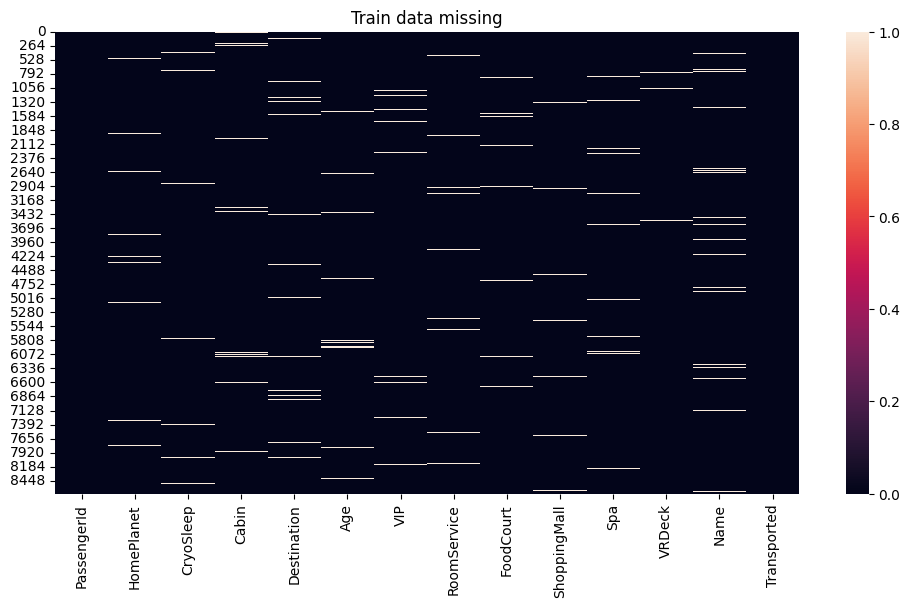

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6)) 
sns.heatmap(train_df.isnull())
plt.title('Train data missing')
plt.show()

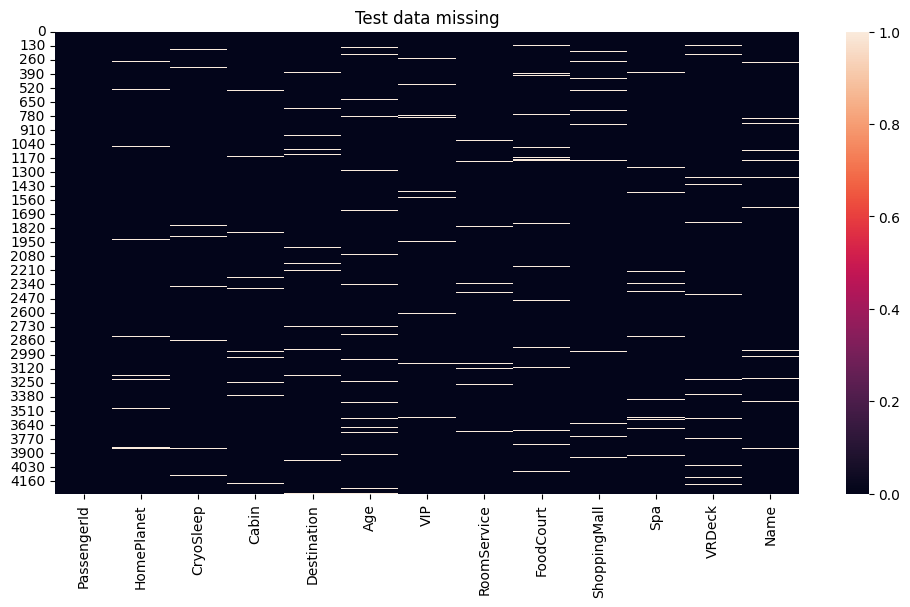

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6)) 
sns.heatmap(test_df.isnull())
plt.title('Test data missing')
plt.show()

In [19]:
train_df.describe

<bound method NDFrame.describe of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService

In [20]:
test_df.describe

<bound method NDFrame.describe of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService

In [21]:
train_df.value_counts()

PassengerId  HomePlanet  CryoSleep  Cabin     Destination    Age   VIP    RoomService  FoodCourt  ShoppingMall  Spa    VRDeck  Name               Transported
0001_01      Europa      False      B/0/P     TRAPPIST-1e    39.0  False  0.0          0.0        0.0           0.0    0.0     Maham Ofracculy    False          1
6162_01      Earth       False      F/1181/S  55 Cancri e    22.0  False  0.0          0.0        1.0           575.0  0.0     Bonyan Hineyley    False          1
6175_01      Earth       False      G/1000/P  TRAPPIST-1e    18.0  False  628.0        0.0        0.0           31.0   150.0   Thel Pittler       False          1
6174_02      Earth       True       G/999/P   PSO J318.5-22  4.0   False  0.0          0.0        0.0           0.0    0.0     Cherry Fisheparks  True           1
6174_01      Earth       False      F/1274/P  55 Cancri e    24.0  False  0.0          479.0      116.0         1.0    37.0    Jord Mcbriddley    False          1
                           

In [22]:
features=train_df.columns[train_df.dtypes=='float64']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

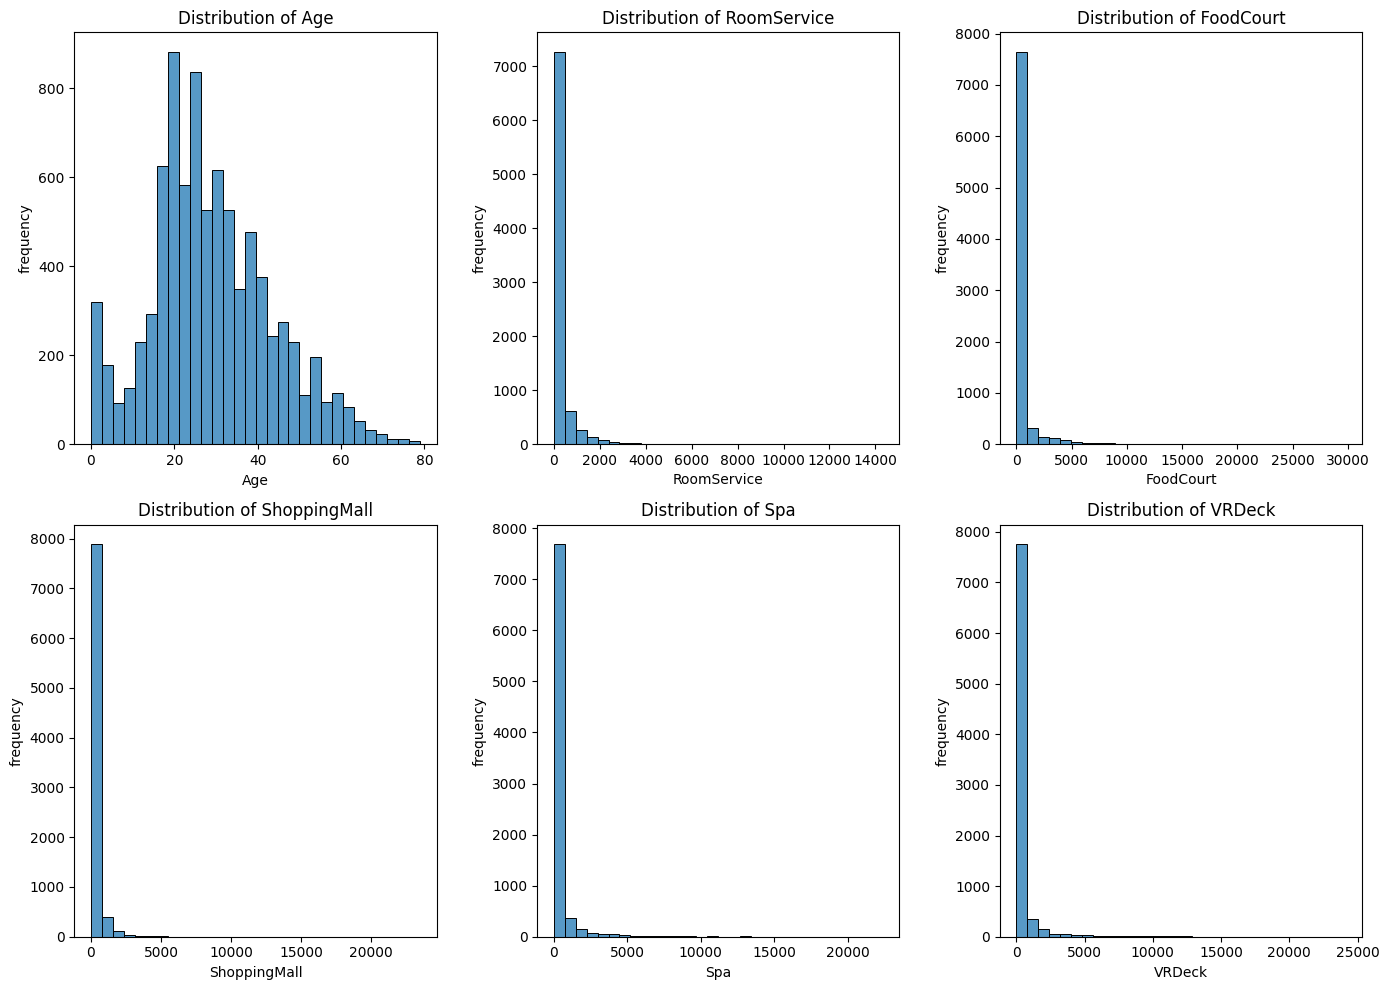

In [23]:
plt.figure(figsize=(14,10))
for i, feature in enumerate(features,1):
    plt.subplot(2,3,i)
    sns.histplot(train_df[feature].dropna(),bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

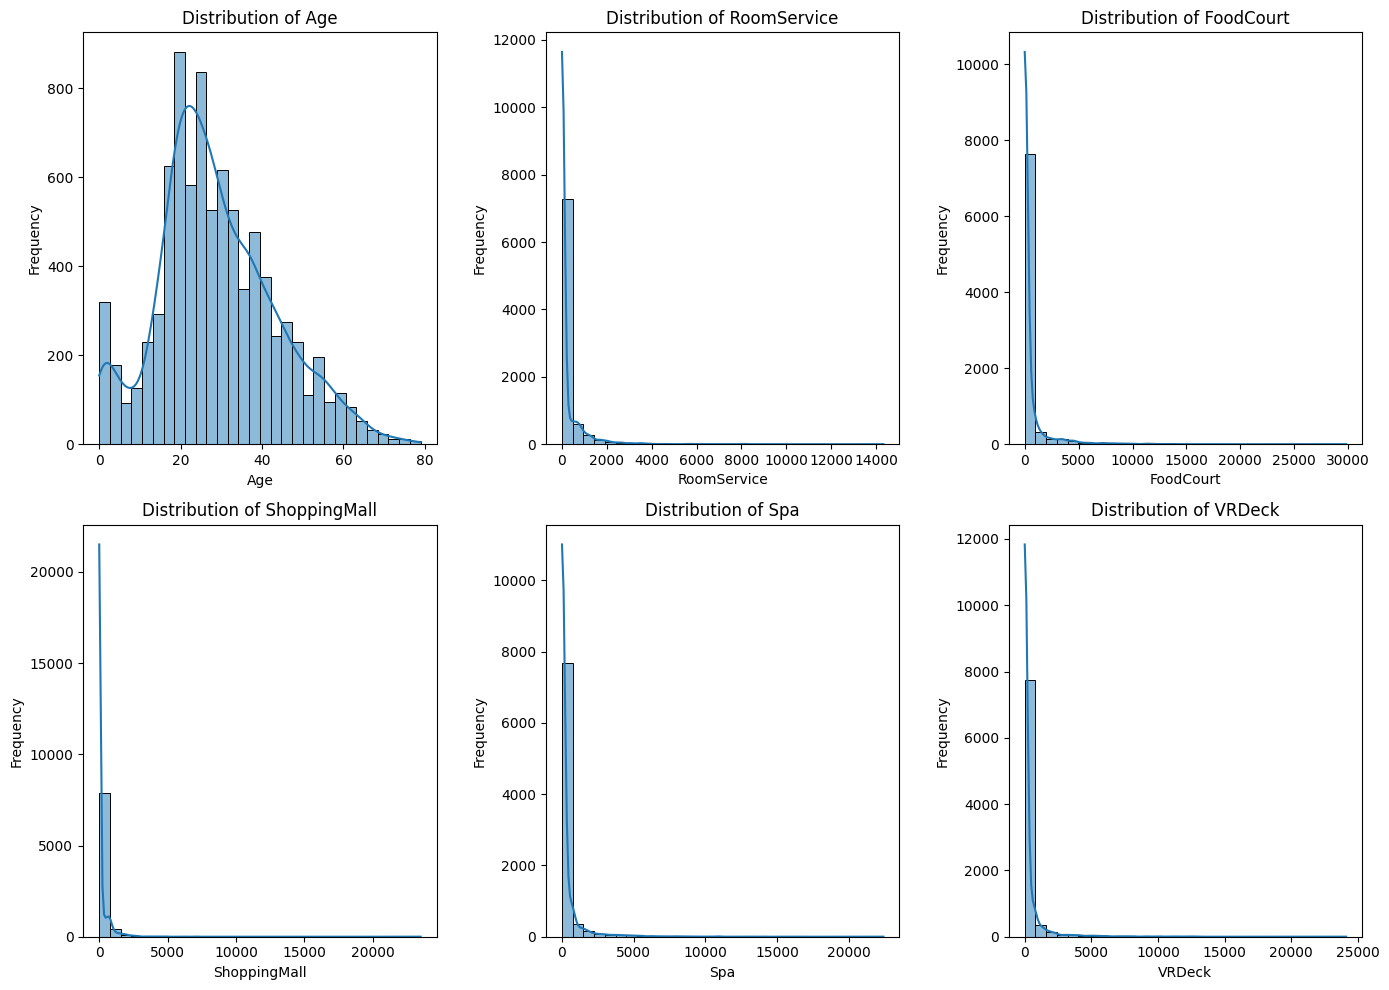

In [24]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # Adjust grid size (2 rows, 3 columns) based on the number of features
    sns.histplot(train_df[feature].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [25]:
features_object=train_df.columns[train_df.dtypes=='Object']

In [27]:

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features_object, 1):
    plt.subplot(2, 2, i)  # Adjust grid size (2 rows, 2 columns) based on the number of features
    sns.countplot(data=train_df, x=feature, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

##  6. Bivrate Analysis

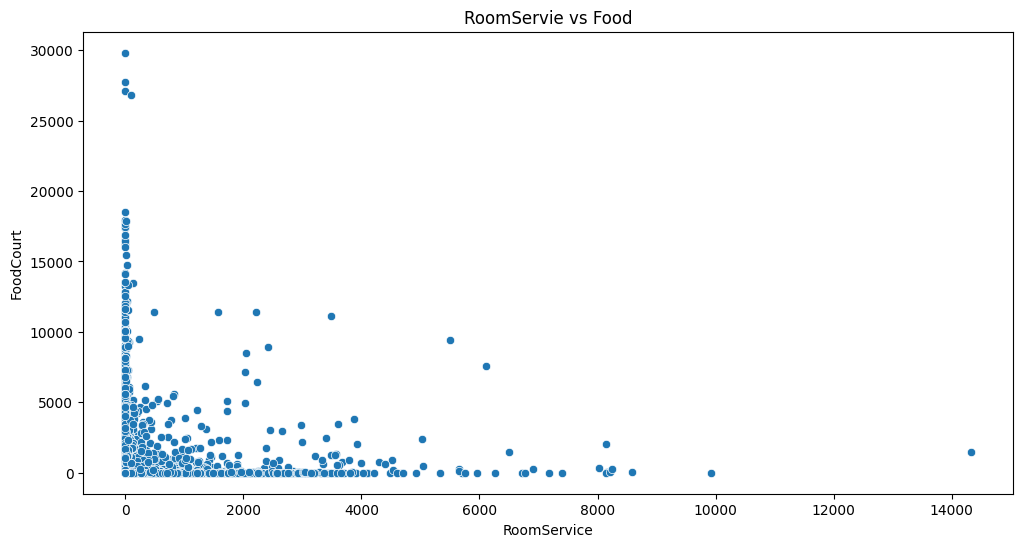

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='RoomService',y='FoodCourt',data=train_df)
plt.title('RoomServie vs Food')
plt.xlabel('RoomService')
plt.ylabel('FoodCourt')
plt.show()

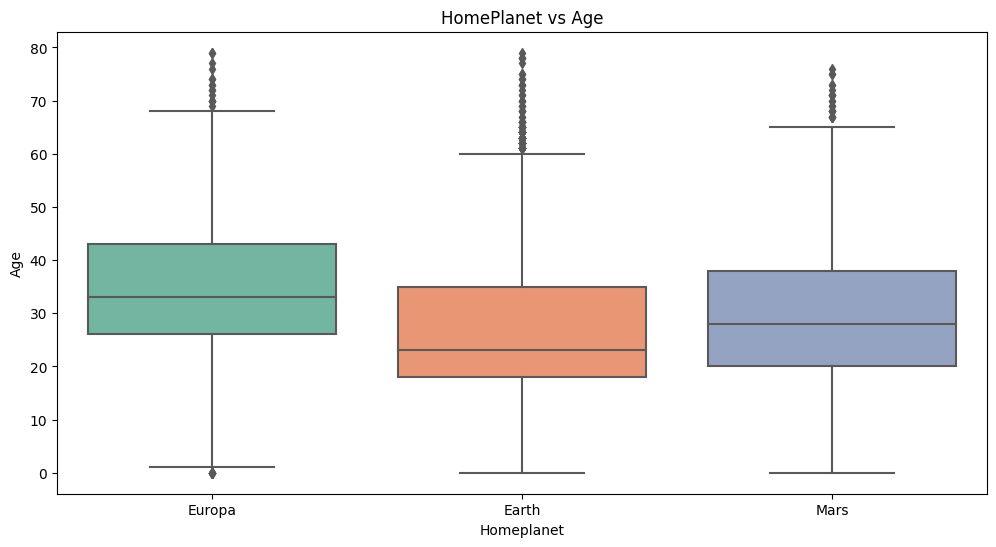

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x='HomePlanet', y='Age', data=train_df, palette='Set2')
plt.title('HomePlanet vs Age')
plt.xlabel('Homeplanet')
plt.ylabel('Age')
plt.show()

In [ ]:
cross_tab = pd.crosstab(train_df['HomePlanet'], train_df['CryoSleep'])
print(cross_tab)

In [ ]:
# Create a stacked bar chart
cross_tab.plot(kind='bar')
plt.title('HomePlanet vs CryoSleep')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [39]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [47]:
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [34]:
train_df['HomePlanet'].fillna(method='ffill', inplace=True)  # Forward fill



/tmp/ipykernel_33/517194722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['HomePlanet'].fillna(method='ffill', inplace=True)  # Forward fill
/tmp/ipykernel_33/517194722.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df['HomePlanet'].fillna(method='ffill', inplace=True)  # Forward fill


In [42]:
train_df['VIP'].fillna(method='ffill', inplace=True)  # Forward fill



/tmp/ipykernel_33/1267630456.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['VIP'].fillna(method='ffill', inplace=True)  # Forward fill
/tmp/ipykernel_33/1267630456.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df['VIP'].fillna(method='ffill', inplace=True)  # Forward fill
/tmp/ipykernel_33/1267630456.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a

In [36]:

train_df['CryoSleep'].fillna(method='bfill', inplace=True)  # Backward fill


/tmp/ipykernel_33/3357280245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['CryoSleep'].fillna(method='bfill', inplace=True)  # Backward fill
/tmp/ipykernel_33/3357280245.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df['CryoSleep'].fillna(method='bfill', inplace=True)  # Backward fill
/tmp/ipykernel_33/3357280245.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and wi

In [40]:

train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)


/tmp/ipykernel_33/4054227536.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)


In [46]:
# 'Transported', 'Name', 'Cabin','HomePlanet','Destination','Deck','CabinNum','Side'
train_df['RoomService'].fillna(train_df['RoomService'].mean(), inplace=True)
train_df['FoodCourt'].fillna(train_df['FoodCourt'].mean(), inplace=True)
train_df['ShoppingMall'].fillna(train_df['ShoppingMall'].mean(), inplace=True)
train_df['Spa'].fillna(train_df['Spa'].mean(), inplace=True)
train_df['VRDeck'].fillna(train_df['VRDeck'].mean(), inplace=True)

/tmp/ipykernel_33/1530419845.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['RoomService'].fillna(train_df['RoomService'].mean(), inplace=True)
/tmp/ipykernel_33/1530419845.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

### One hot encoding

In [ ]:
y.dtypes

In [48]:

train_df['CryoSleep'] = train_df['CryoSleep'].astype(str)
train_df['VIP'] = train_df['VIP'].astype(str)

# Now map the values
train_df['CryoSleep'] = train_df['CryoSleep'].map({'True': 1, 'False': 0})
train_df['VIP'] = train_df['VIP'].map({'True': 1, 'False': 0})





In [49]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [80]:
test_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [51]:

test_df['CryoSleep'] = test_df['CryoSleep'].astype(str)
test_df['VIP'] = test_df['VIP'].astype(str)

# Now map the values
test_df['CryoSleep'] = test_df['CryoSleep'].map({'True': 1, 'False': 0})
test_df['VIP'] = test_df['VIP'].map({'True': 1, 'False': 0})

test_df.head()



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,1.0,G/3/S,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,0.0,F/4/S,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,1.0,C/0/S,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,0.0,C/1/S,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,0.0,F/5/S,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez


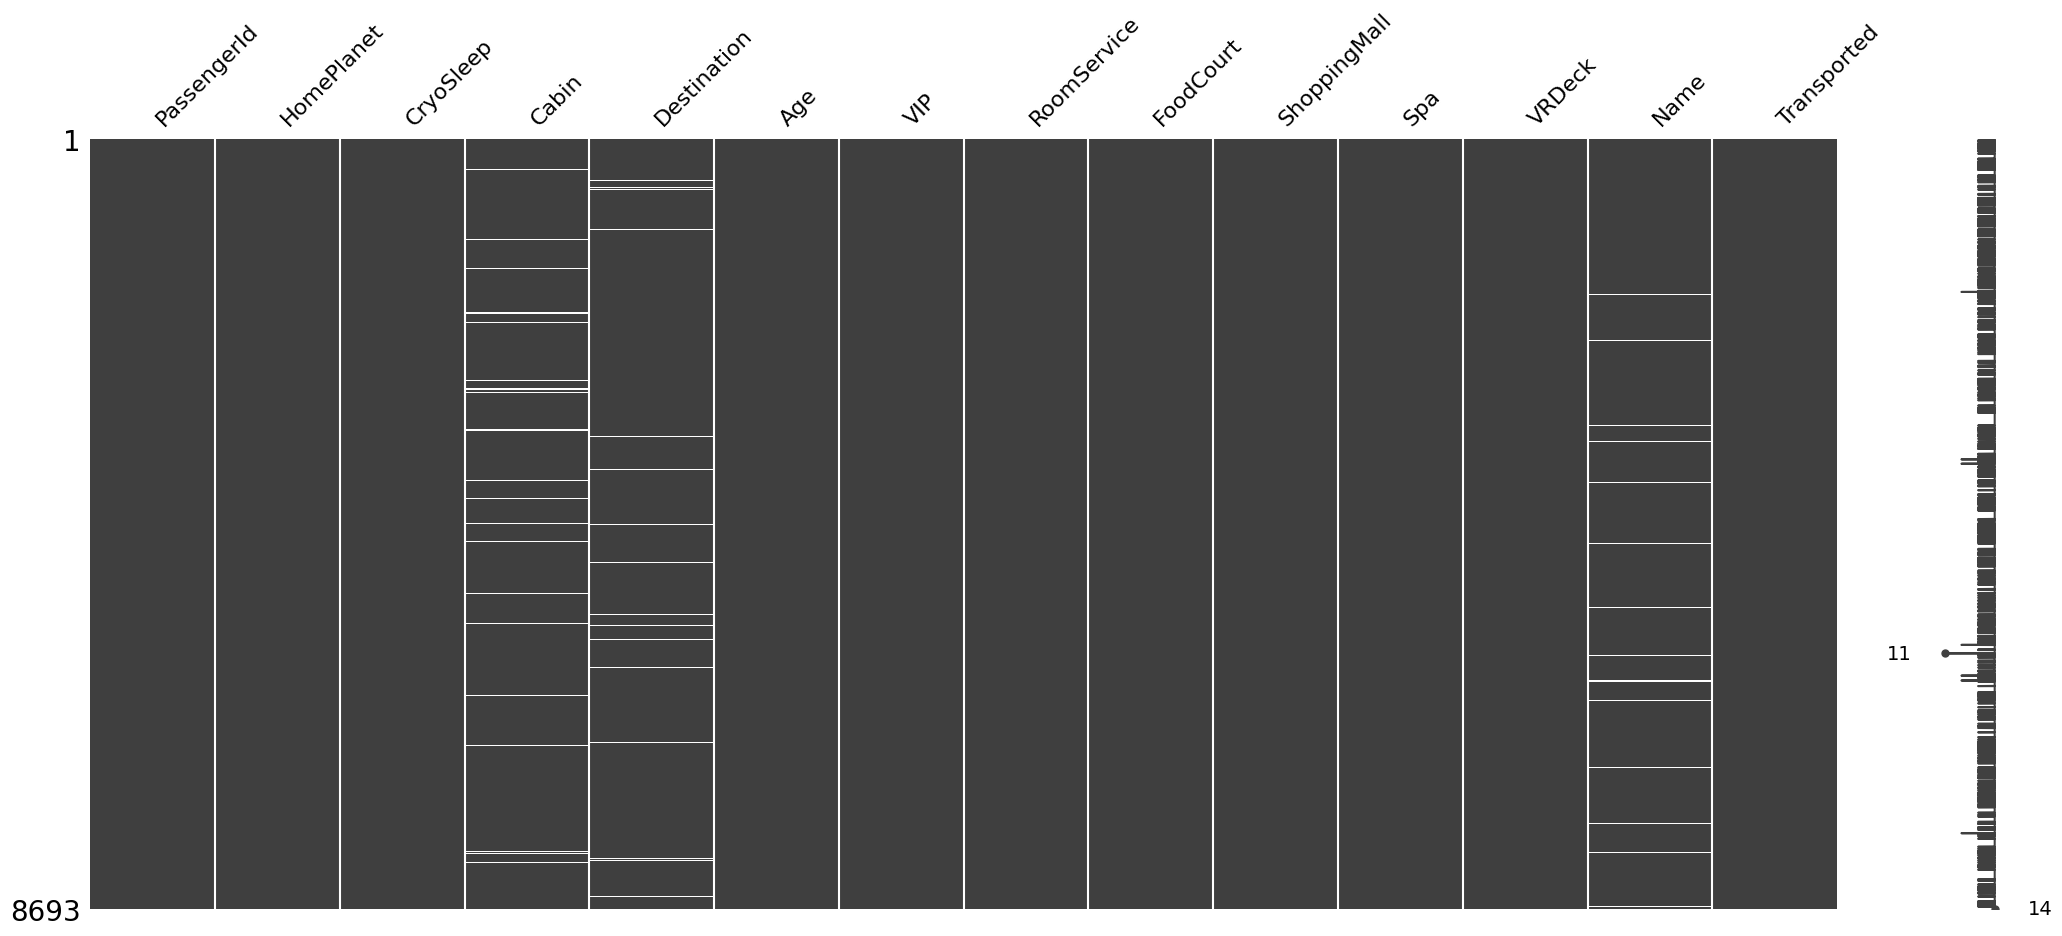

In [52]:
import missingno as msn 
msn.matrix(train_df)
plt.show()

In [62]:
test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination      92
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

In [ ]:
correlation_matrix=train_df.corr()
print(correlation_matrix)

In [61]:

test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

test_df['CryoSleep'].fillna(method='bfill', inplace=True)  # Backward fill
test_df['VIP'].fillna(method='ffill', inplace=True)  # Forward fill

test_df['HomePlanet'].fillna(method='ffill', inplace=True)  # Forward fill



/tmp/ipykernel_33/1571616627.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
/tmp/ipykernel_33/1571616627.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [58]:
# 'Transported', 'Name', 'Cabin','HomePlanet','Destination','Deck','CabinNum','Side'
test_df['RoomService'].fillna(test_df['RoomService'].mean(), inplace=True)
test_df['FoodCourt'].fillna(test_df['FoodCourt'].mean(), inplace=True)
test_df['ShoppingMall'].fillna(test_df['ShoppingMall'].mean(), inplace=True)
test_df['Spa'].fillna(test_df['Spa'].mean(), inplace=True)
test_df['VRDeck'].fillna(test_df['VRDeck'].mean(), inplace=True)
test_df.shape

/tmp/ipykernel_33/2056216523.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['RoomService'].fillna(test_df['RoomService'].mean(), inplace=True)
/tmp/ipykernel_33/2056216523.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

(4277, 13)

In [ ]:
train_df.describe()

### Feature Engineering 

In [53]:
train_df['TotalSpent']=train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)


In [54]:

# train_df[['Deck', 'CabinNum', 'Side']] = train_df['Cabin'].str.split('/', expand=True)
# train_df['CabinNum'] = pd.to_numeric(train_df['CabinNum'], errors='coerce')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpent
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


In [63]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoder = LabelEncoder()
train_df['HomePlanet'] = label_encoder.fit_transform(train_df['HomePlanet'].astype(str))
test_df['HomePlanet'] = label_encoder.transform(test_df['HomePlanet'].astype(str))





ValueError: y contains previously unseen labels: 'Earth'

In [55]:
# train_df[train_df['Destination']=='55 Cancri e']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpent,Deck,CabinNum,Side
9,0008_01,1,1,B/1/P,55 Cancri e,14.0,0,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0.0,B,1,P
11,0008_03,1,0,B/1/P,55 Cancri e,45.0,0,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True,8157.0,B,1,P
17,0015_01,0,0,F/4/P,55 Cancri e,24.0,0,0.0,1.0,0.0,0.0,637.0,Carry Hughriend,False,638.0,F,4,P
20,0017_02,0,0,F/6/P,55 Cancri e,14.0,0,412.0,0.0,1.0,0.0,679.0,Philda Brighttt,False,1092.0,F,6,P
22,0020_02,0,1,E/0/S,55 Cancri e,49.0,0,0.0,0.0,0.0,0.0,0.0,Glendy Brantuarez,False,0.0,E,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,9252_02,1,1,B/301/P,55 Cancri e,19.0,0,0.0,0.0,0.0,0.0,0.0,Muonon Stranbeate,True,0.0,B,301,P
8677,9264_01,1,1,E/606/S,55 Cancri e,30.0,0,0.0,0.0,0.0,0.0,0.0,Giedir Sionerorly,True,0.0,E,606,S
8681,9270_01,0,1,G/1497/S,55 Cancri e,33.0,0,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True,0.0,G,1497,S
8688,9276_01,1,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,A,98,P


In [ ]:
train_df.head()

In [71]:
X = train_df.drop(columns=['Transported', 'Name', 'Cabin','HomePlanet','Destination'])
y = train_df['Transported']

# Drop columns not in the test dataset
X_test = test_df.drop(columns=[ 'Name', 'Cabin','HomePlanet','Destination'])


In [65]:
print(X_test)

     PassengerId  CryoSleep        Age  VIP  RoomService  FoodCourt  \
0        0013_01        1.0  27.000000  0.0          0.0        0.0   
1        0018_01        0.0  19.000000  0.0          0.0        9.0   
2        0019_01        1.0  31.000000  0.0          0.0        0.0   
3        0021_01        0.0  38.000000  0.0          0.0     6652.0   
4        0023_01        0.0  20.000000  0.0         10.0        0.0   
...          ...        ...        ...  ...          ...        ...   
4272     9266_02        1.0  34.000000  0.0          0.0        0.0   
4273     9269_01        0.0  42.000000  0.0          0.0      847.0   
4274     9271_01        1.0  28.658146  0.0          0.0        0.0   
4275     9273_01        0.0  28.658146  0.0          0.0     2680.0   
4276     9277_01        1.0  43.000000  0.0          0.0        0.0   

      ShoppingMall     Spa  VRDeck  
0              0.0     0.0     0.0  
1              0.0  2823.0     0.0  
2              0.0     0.0     0.0  

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Assuming you summed up some features to create 'TotalSpent'
test_df['TotalSpent'] = test_df['RoomService'] + test_df['FoodCourt'] + test_df['ShoppingMall'] + test_df['Spa'] + test_df['VRDeck']


In [73]:
# Reorder X_test columns to match X_train
X_test = X_test[X_train.columns]


# Model seletion

## Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred_log = model1.predict(X_val)

# Evaluate
print(f"Accuracy: {accuracy_score(y_val, y_pred_log)}")
print(classification_report(y_val, y_pred_log))


Accuracy: 0.7567567567567568
              precision    recall  f1-score   support

       False       0.82      0.65      0.73       861
        True       0.72      0.86      0.78       878

    accuracy                           0.76      1739
   macro avg       0.77      0.76      0.75      1739
weighted avg       0.77      0.76      0.75      1739



### Random Forest 

In [76]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

# Predictions
y_pred_ran = model2.predict(X_val)

# Evaluate
print(f"Accuracy: {accuracy_score(y_val, y_pred_ran)}")
print(classification_report(y_val, y_pred_ran))


Accuracy: 0.7544565842438183
              precision    recall  f1-score   support

       False       0.75      0.75      0.75       861
        True       0.76      0.76      0.76       878

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.75      1739
weighted avg       0.75      0.75      0.75      1739



## Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier()
model3.fit(X_train, y_train)


# Predictions
y_pred_gra= model3.predict(X_val)

# Evaluate
print(f"Accuracy: {accuracy_score(y_val, y_pred_gra)}")
print(classification_report(y_val, y_pred_gra))



Accuracy: 0.7860839562967222
              precision    recall  f1-score   support

       False       0.82      0.73      0.77       861
        True       0.76      0.84      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [78]:
print(X_test)

     PassengerId  CryoSleep        Age  VIP  RoomService  FoodCourt  \
0        0013_01        1.0  27.000000  0.0          0.0        0.0   
1        0018_01        0.0  19.000000  0.0          0.0        9.0   
2        0019_01        1.0  31.000000  0.0          0.0        0.0   
3        0021_01        0.0  38.000000  0.0          0.0     6652.0   
4        0023_01        0.0  20.000000  0.0         10.0        0.0   
...          ...        ...        ...  ...          ...        ...   
4272     9266_02        1.0  34.000000  0.0          0.0        0.0   
4273     9269_01        0.0  42.000000  0.0          0.0      847.0   
4274     9271_01        1.0  28.658146  0.0          0.0        0.0   
4275     9273_01        0.0  28.658146  0.0          0.0     2680.0   
4276     9277_01        1.0  43.000000  0.0          0.0        0.0   

      ShoppingMall     Spa  VRDeck  TotalSpent  
0              0.0     0.0     0.0         0.0  
1              0.0  2823.0     0.0      2832.0  


In [79]:
# Make predictions
test_predictions = model2.predict(X_test)

# Prepare submission
submission_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': test_predictions
})

# Save submission file
submission_df.to_csv('submission2.csv', index=False)


In [101]:
def predict_passenger_transport(passenger_id, model, test_df, test_features):
    # Extract the passenger's data
    passenger_data = test_df[test_df['PassengerId'] == passenger_id]
    
    # Apply the same preprocessing steps as you did for the train data
    passenger_data = passenger_data[test_features.columns]  # Align columns

    # Predict using the trained model
    prediction = model.predict(passenger_data)
    
    # Output the result
    if prediction[0] == 1:
        return f"Passenger {passenger_id} was transported to an alternate dimension."
    else:
        return f"Passenger {passenger_id} was NOT transported to an alternate dimension."

# Example usage:
result = predict_passenger_transport('001', model1, test_df, X_test)
print(result)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Transported


In [80]:
an= pd.read_csv('/kaggle/working/submission2.csv')
len(an)

4277